# User Defined Problem (UDP) - Simple problem
### Tiny obervatory in DRO (5 satellites)

You can else try out the more difficult problems:
- from problems.golomb_medium import udp
- from problems.golomb_hard import udp

Do not forget to generate a larger chromosome for these as 40 satellites need to be placed !

In [1]:
from problems.golomb_simple import udp

#### Random chromosomes - fitness landscape exploration


[0.02040816326530612]

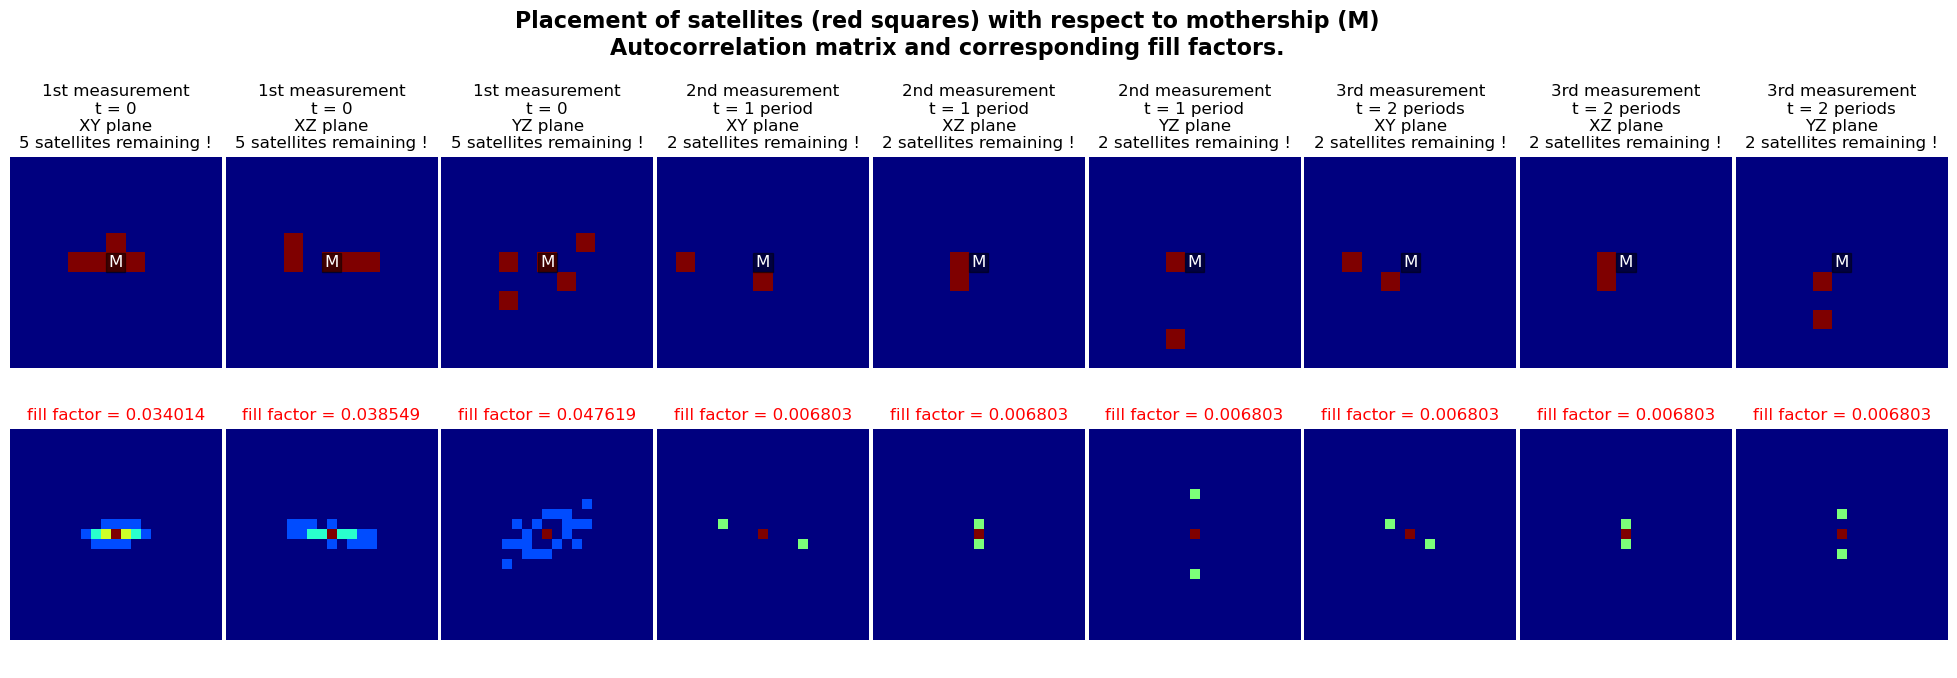

In [2]:
# Relative position and velocity of satellites: dx, dy, dz, dvx, dvy, dvz
satellite_1 = [ 0.1,  0.0,  0.1, -0.0042, -0.004,  0.0023]
satellite_2 = [ 0.0,  0.2,  0.4, -0.0001,  0.001,  0.0003]
satellite_3 = [ 0.0, -0.1,  0.3,  0.0201,  0.025,  0.0001]
satellite_4 = [ 0.2,  0.0, -0.2, -0.0001,  0.003, -0.0100]
satellite_5 = [ 0.1, -0.2, -0.3,  0.0000,  0.001, -0.0117]

all_satellites = [satellite_1 , satellite_2 , satellite_3 , satellite_4 , satellite_5]

# Encode into [x,x,x,x,x,x,y,y,y,y,....,vz,vz,vz,vz,vz,vz]
x_encoded = [dx[i] for i in range(6) for dx in all_satellites]

# Call only the udp fitness
# fitness = udp.fitness(x_encoded)

# This function calls the udp fitness and plots the solution
udp.plot(x_encoded, figsize=(25,7))

### Submit your solution

In [3]:
""" Submission helper to generate a .json-file for submission to optimize.esa.int. """
import json
import numpy

def create_submission(challenge_id, problem_id, x, fn_out = './submission.json', name = '', description= ''):
    """ The following parameters are mandatory to create a submission file:

        challenge_id: a string of the challenge identifier (found on the corresponding problem page)
        problem_id: a string of the problem identifier (found on the corresponding problem page)
        x: for single-objective problems: a list of numbers determining the decision vector
           for multi-objective problems: a list of list of numbers determining a population of decision vectors

        Optionally provide:
        fn_out: a string indicating the output path and filename
        name: a string that can be used to give your submission a title
        description: a string that can contain meta-information about your submission
    """
    assert type(challenge_id) == str
    assert type(problem_id) == str
    assert type(x) in [list, numpy.ndarray]
    assert type(fn_out) == str
    assert type(name) == str
    assert type(description) == str

    # converting numpy datatypes to python datatypes
    x = numpy.array(x).tolist()

    d = {'decisionVector':x,
         'problem':problem_id,
         'challenge':challenge_id,
         'name':name,
         'description':description }

    with open(fn_out, 'wt') as json_file:
        json.dump([d], json_file, indent = 6)

In [4]:
challenge = "spoc-3-interferometric-mission"
problem = "tiny-observatory-in-dro" # Use correct problem identifier (you can find it on the problem website)

# Optional arguments
file_name = "submission_file.json"
submission_name = "submission_name"
submission_description = "submission_description"

In [5]:
create_submission(challenge_id = challenge, problem_id = problem, x = x_encoded, fn_out = file_name, name = submission_name, description = submission_description) 

#### For illustration purposes let's simulate one orbit of interferometric measurments. (This part is unrelated to the fitness of the competition !)

XY


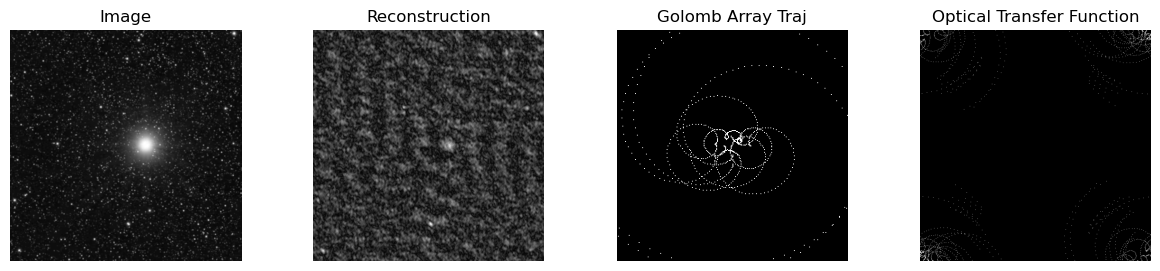

XZ


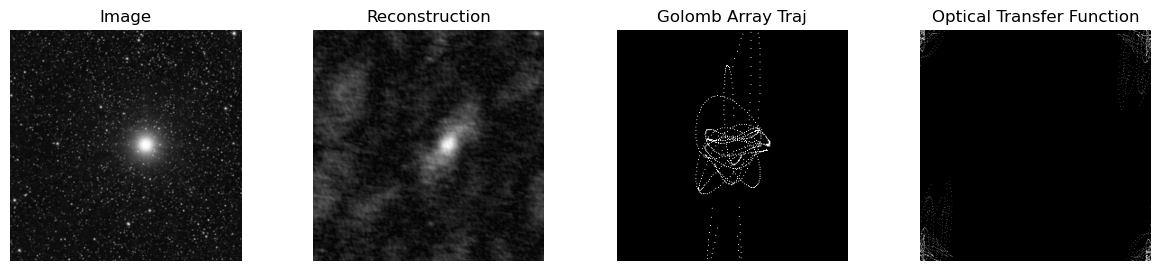

YZ


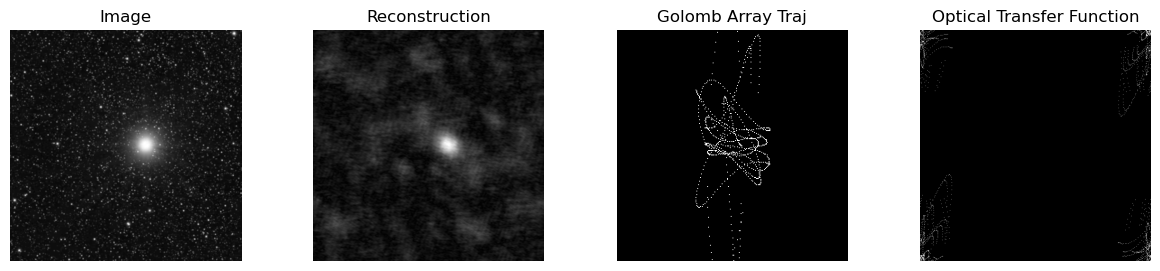

In [6]:
# Number of observed points
N_obs = 300

udp.plot_simulated_reconstruction(x_encoded, N_obs, image_path="data/star.jpg")